<h1>   
Results from Test Data using trained model
</h1>

In this notebook, we restore the trained model (titanic_train_softmax.py) and use it to predict the survivality of the passengers in test.csv data.

In [7]:
# To suppress the compiler warning in my computer
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
#################################################
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing functions from data_loader.py file
from data_loader import load_train_data, get_batch, load_test_data

In [8]:
# This program restores the pre-trained model and predicts the 
# survivality of passengers in the file test.csv
# Loading the test data

test_file_name = "test.csv"
test_input = load_test_data(test_file_name)

In [9]:
# Placeholder for input data 
x = tf.placeholder(tf.float32, shape=[None, 5])

In [10]:
# checkpoints directory - where it was saved during the training 
directory = "checkpoints/trained_model-1000.meta"
with tf.Session() as sess:
	# Restoring variables
	saver = tf.train.import_meta_graph(directory)
	saver.restore(sess, tf.train.latest_checkpoint('./checkpoints/'))
	test_length = len(test_input)
	# changing input data into tensor constant
	x = tf.constant(test_input, tf.float32, shape=[test_length, 5])
	# restoring the variables: weights and biases
	weights = sess.run('weights:0')
	biases = sess.run('biases:0')
	W = tf.constant(weights, tf.float32, shape=[5, 2])
	b = tf.constant(biases, tf.float32, shape=[2])
	y = tf.nn.softmax(tf.matmul(x, W) + b)
	y = y.eval() # y changed from tensorform to array

INFO:tensorflow:Restoring parameters from ./checkpoints/trained_model-1000


In [11]:
test_data = pd.read_csv("test.csv")

y_list = y.tolist()
survivality = []
# Changing survivality in [survived, died] to 1/0 form 
for i in range(len(y_list)):
    if y_list[i][0] > 0.5: 
        survivality.append(1)
    if y_list[i][1] > 0.5:
        survivality.append(0)
df = pd.DataFrame(test_data)
# Adding the survivality column in the test data and replacing 
# it by the predicted results.
df['Survived'] = survivality
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


<h2>Let us see some of the results:</h2> 

In [12]:
df.groupby(df['Survived'], axis=0).size()
# 0 = Died
# 1 = Survived

Survived
0    302
1    116
dtype: int64

In [13]:
# Passenger coutns by Sex
df.groupby(df['Sex'], axis=0).size()

Sex
female    152
male      266
dtype: int64

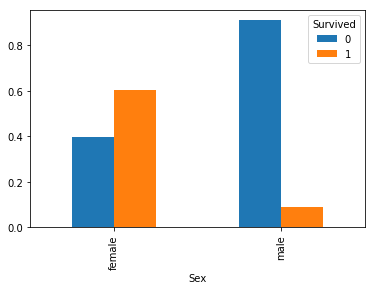

In [14]:
sex = pd.crosstab(df['Sex'], df['Survived'])
fig = sex.div(sex.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
fig = plt.show()

<h2>
Since the accuracy of the training was not good (~82%), the predicted results may not be good enough to analyze seriously. This model is very crude with very few dependent variables, we can't expect accurate results, but there are still many rooms left to make it better. I think, extra variable engineering based on the other information in the given dataset can be the first thing to do. I have considered only five of the variables here in this analysis.
</h2>